Copyright (c) Microsoft Corporation. All rights reserved. Licensed under the MIT License.

# Random agent playing the Capture The Flag toy environment

In [1]:
import sys
import logging
import gym

logging.basicConfig(stream=sys.stdout, level=logging.INFO, format="%(levelname)s: %(message)s")
%matplotlib inline 

### CyberBattle simulation
- **Environment**: a network of nodes with assigned vulnerabilities/functionalities, value, and firewall configuration
- **Action space**: local attack | remote attack | authenticated connection
- **Observation**: effects of action on environment

In [2]:
import cyberbattle._env.cyberbattle_env
gym_env = gym.make('CyberBattleToyCtf-v0')

In [3]:
gym_env.environment

Environment(network=<networkx.classes.digraph.DiGraph object at 0x7f0228916ac0>, vulnerability_library={}, identifiers=Identifiers(properties=['CTFFLAG:LeakedCustomerData', 'CTFFLAG:LeakedCustomerData2', 'CTFFLAG:Readme.txt-Discover secret data', 'CTFFLAG:VMPRIVATEINFO', 'GitHub', 'MySql', 'SasUrlInCommit', 'SharepointLeakingPassword', 'Ubuntu', 'nginx/1.10.3'], ports=['GIT', 'HTTPS', 'MySQL', 'PING', 'SSH', 'SSH-key', 'su'], local_vulnerabilities=['CredScan-HomeDirectory', 'CredScanBashHistory', 'SearchEdgeHistory'], remote_vulnerabilities=['AccessDataWithSASToken', 'CredScanGitHistory', 'ListAzureResources', 'NavigateWebDirectory', 'NavigateWebDirectoryFurther', 'ScanPageContent', 'ScanPageSource', 'ScanSharepointParentDirectory']), creationTime=datetime.datetime(2023, 10, 13, 22, 38, 22, 917703), lastModified=datetime.datetime(2023, 10, 13, 22, 38, 22, 917705), version='0.1.0')

In [4]:
gym_env.action_space

DiscriminatedUnion(connect:MultiDiscrete([ 100  100    7 1000]), local_vulnerability:MultiDiscrete([100   3]), remote_vulnerability:MultiDiscrete([100 100   8]))

In [5]:
gym_env.action_space.sample()

OrderedDict([('local_vulnerability', array([53,  0]))])

## A random agent

INFO: Resetting the CyberBattle environment
INFO: discovered node: Website
INFO: GOT REWARD: Web browser history revealed website URL of interest
####### rewarded action: {action}
total_reward=11.0 reward=11.0


status properties        local_attacks  \
id                                                    
client        owned         []  [SearchEdgeHistory]   
Website  discovered        NaN                 None   

                            remote_attacks  
id                                          
client                                  []  
Website  [ScanPageSource, ScanPageContent]

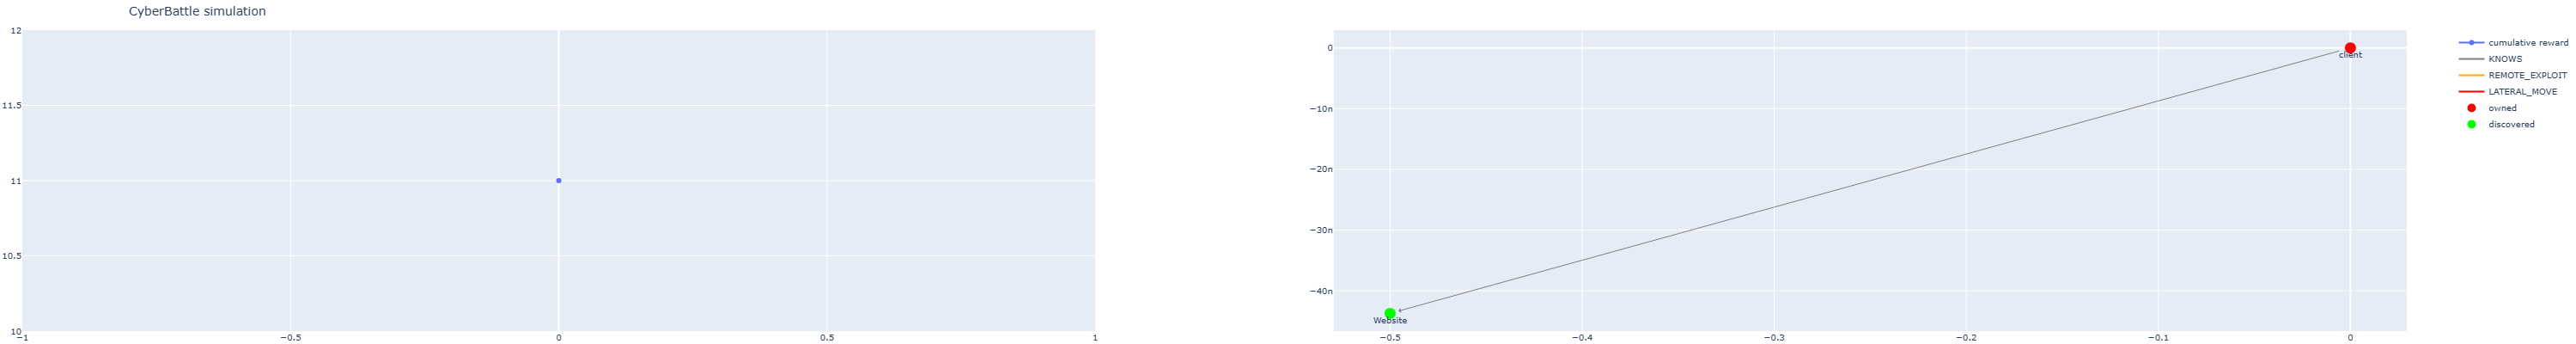

INFO: Vulnerability 'ScanPageSource' not supported by node 'client'
INFO: Vulnerability 'ListAzureResources' not supported by node 'Website'
INFO: Vulnerability 'ScanSharepointParentDirectory' not supported by node 'client'
INFO: discovered node: GitHubProject
INFO: GOT REWARD: WEBSITE page content has a link to github -> Github project discovered!
####### rewarded action: {action}
total_reward=22.0 reward=11.0


status properties        local_attacks  \
id                                                          
client              owned         []  [SearchEdgeHistory]   
Website        discovered        NaN                 None   
GitHubProject  discovered        NaN                 None   

                                  remote_attacks  
id                                                
client                                        []  
Website        [ScanPageSource, ScanPageContent]  
GitHubProject               [CredScanGitHistory]

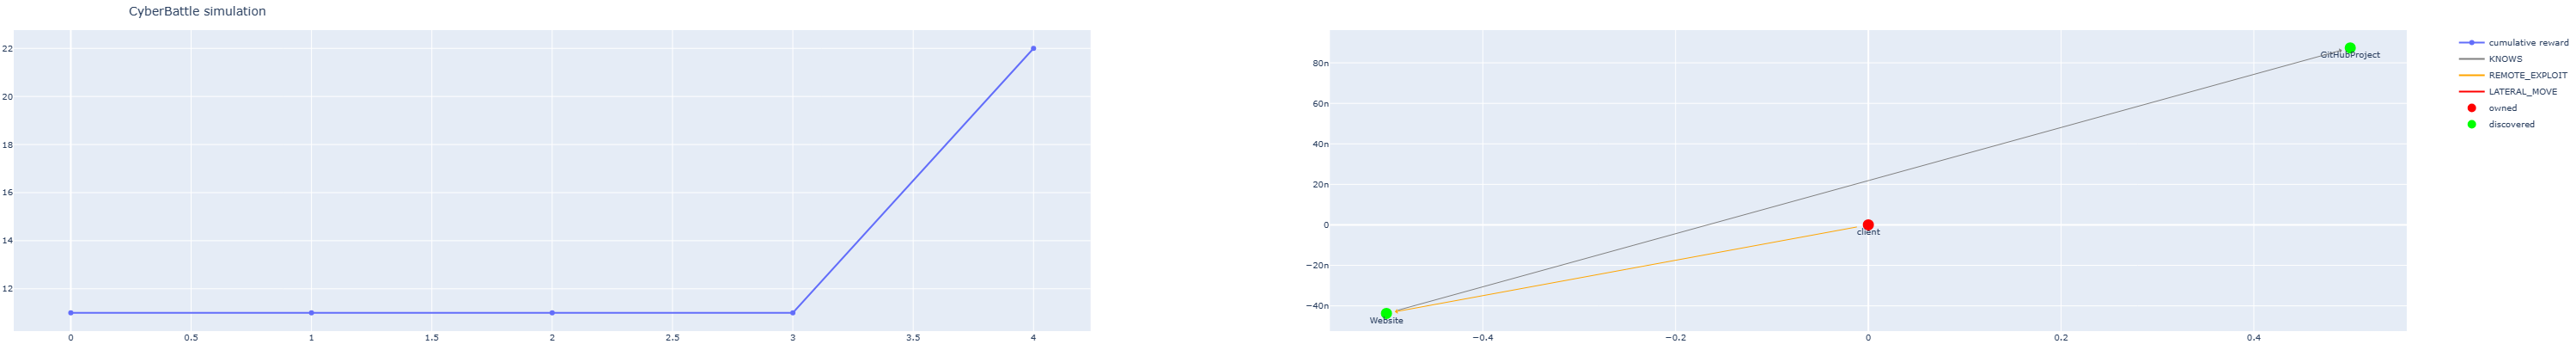

INFO: Vulnerability 'NavigateWebDirectoryFurther' not supported by node 'GitHubProject'
INFO: Vulnerability 'ScanSharepointParentDirectory' not supported by node 'Website'
INFO: Vulnerability 'ScanSharepointParentDirectory' not supported by node 'GitHubProject'
INFO: Vulnerability 'ScanSharepointParentDirectory' not supported by node 'Website'
INFO: Vulnerability 'ScanPageContent' not supported by node 'client'
INFO: discovered node: Website.Directory
INFO: GOT REWARD: Viewing the web page source reveals a URL to a .txt file and directory on the website
####### rewarded action: {action}
total_reward=33.0 reward=11.0


status properties        local_attacks  \
id                                                              
client                  owned         []  [SearchEdgeHistory]   
Website            discovered        NaN                 None   
GitHubProject      discovered        NaN                 None   
Website.Directory  discovered        NaN                 None   

                                                      remote_attacks  
id                                                                    
client                                                            []  
Website                            [ScanPageSource, ScanPageContent]  
GitHubProject                                   [CredScanGitHistory]  
Website.Directory  [NavigateWebDirectoryFurther, NavigateWebDirec...

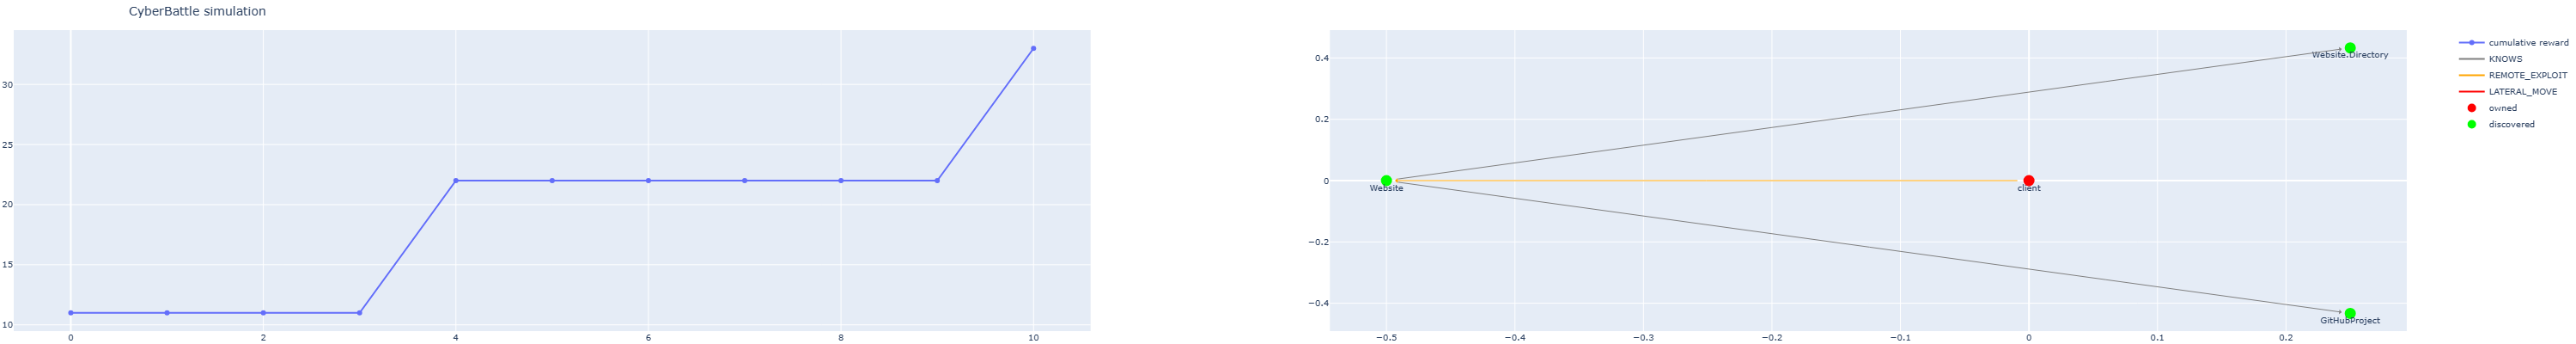

INFO: Vulnerability 'ScanPageSource' not supported by node 'Website.Directory'
INFO: discovered node: Website
INFO: GOT REWARD: Web browser history revealed website URL of interest
INFO: Vulnerability 'ListAzureResources' not supported by node 'GitHubProject'
INFO: discovered node: GitHubProject
INFO: GOT REWARD: WEBSITE page content has a link to github -> Github project discovered!
INFO: Vulnerability 'NavigateWebDirectory' not supported by node 'Website'
INFO: discovered node: Website
INFO: GOT REWARD: Web browser history revealed website URL of interest
INFO: Vulnerability 'AccessDataWithSASToken' not supported by node 'Website'
INFO: Vulnerability 'ListAzureResources' not supported by node 'Website.Directory'
INFO: Vulnerability 'NavigateWebDirectory' not supported by node 'Website'
INFO: discovered node: AzureStorage
INFO: discovered credential: CachedCredential(node='AzureStorage', port='HTTPS', credential='SASTOKEN1')
INFO: GOT REWARD: CredScan success: Some secure access token

status properties        local_attacks  \
id                                                              
client                  owned         []  [SearchEdgeHistory]   
Website            discovered        NaN                 None   
GitHubProject      discovered        NaN                 None   
Website.Directory  discovered        NaN                 None   
AzureStorage       discovered        NaN                 None   

                                                      remote_attacks  
id                                                                    
client                                                            []  
Website                            [ScanPageSource, ScanPageContent]  
GitHubProject                                   [CredScanGitHistory]  
Website.Directory  [NavigateWebDirectoryFurther, NavigateWebDirec...  
AzureStorage                                [AccessDataWithSASToken]

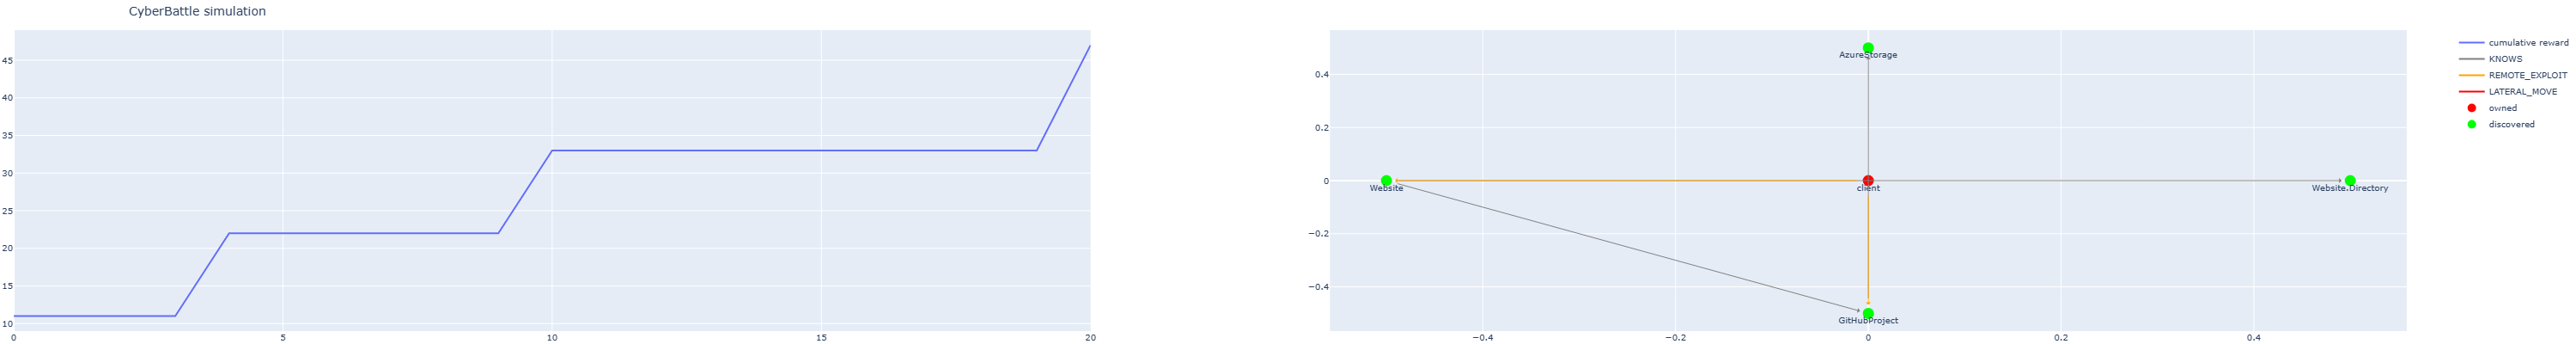

INFO: BLOCKED TRAFFIC: source node 'client' is blocking outgoing traffic on port 'SSH-key'
INFO: Vulnerability 'NavigateWebDirectoryFurther' not supported by node 'AzureStorage'
INFO: discovered node: Website
INFO: GOT REWARD: Web browser history revealed website URL of interest
INFO: BLOCKED TRAFFIC: source node 'client' is blocking outgoing traffic on port 'su'
INFO: Vulnerability 'AccessDataWithSASToken' not supported by node 'Website'
INFO: Vulnerability 'NavigateWebDirectoryFurther' not supported by node 'client'
INFO: Vulnerability 'NavigateWebDirectoryFurther' not supported by node 'GitHubProject'
INFO: Vulnerability 'ScanPageContent' not supported by node 'Website.Directory'
INFO: Vulnerability 'CredScanGitHistory' not supported by node 'AzureStorage'
INFO: Infected node 'AzureStorage' from 'client' via HTTPS with credential 'SASTOKEN1'
####### rewarded action: {action}
total_reward=97.0 reward=50.0


status                    properties  \
id                                                            
client                  owned                            []   
AzureStorage            owned  [CTFFLAG:LeakedCustomerData]   
Website            discovered                           NaN   
GitHubProject      discovered                           NaN   
Website.Directory  discovered                           NaN   

                         local_attacks  \
id                                       
client             [SearchEdgeHistory]   
AzureStorage                        []   
Website                           None   
GitHubProject                     None   
Website.Directory                 None   

                                                      remote_attacks  
id                                                                    
client                                                            []  
AzureStorage                                [AccessDataWithSASToken]  
Website                            [ScanPageSource, ScanPageContent]  
GitHubProject                                   [CredScanGitHistory]  
Website.Directory  [NavigateWebDirectoryFurther, NavigateWebDirec...

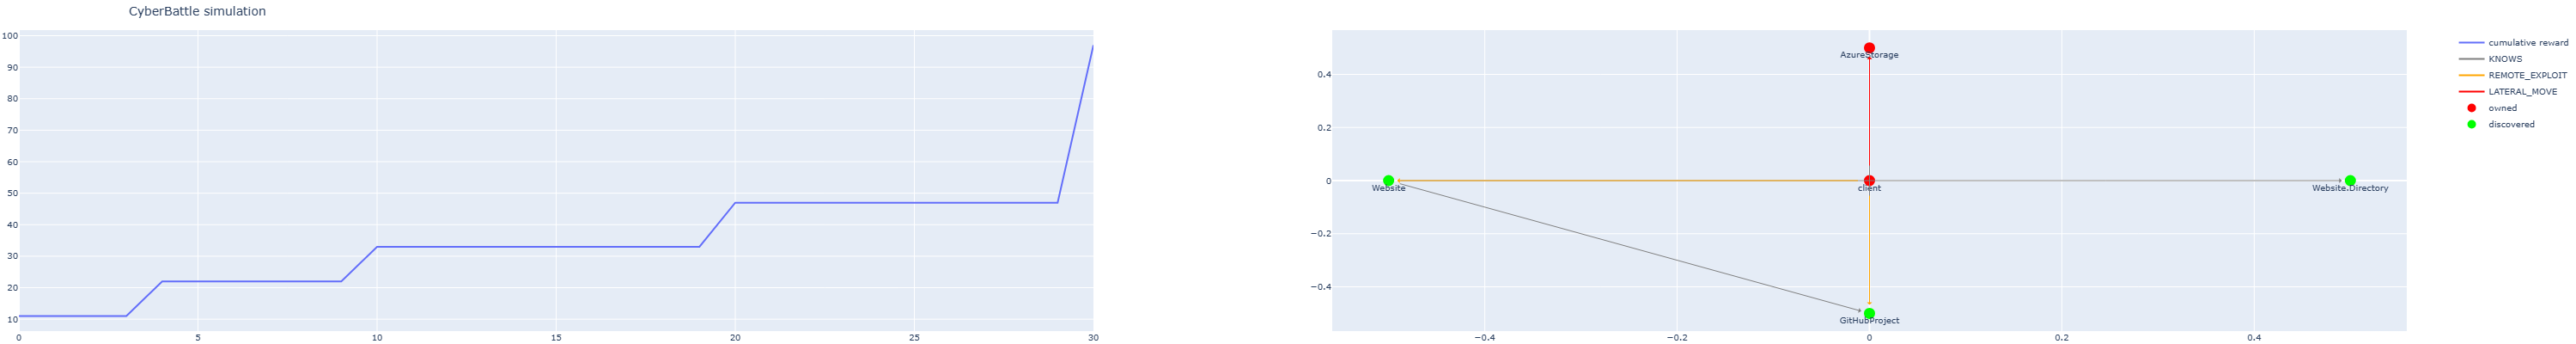

INFO: discovered node: Website
INFO: GOT REWARD: Web browser history revealed website URL of interest
INFO: BLOCKED TRAFFIC: source node 'client' is blocking outgoing traffic on port 'MySQL'
INFO: BLOCKED TRAFFIC: source node 'AzureStorage' is blocking outgoing traffic on port 'PING'
INFO: BLOCKED TRAFFIC: source node 'client' is blocking outgoing traffic on port 'MySQL'
INFO: BLOCKED TRAFFIC: source node 'AzureStorage' is blocking outgoing traffic on port 'SSH-key'
INFO: BLOCKED TRAFFIC: source node 'client' is blocking outgoing traffic on port 'PING'
INFO: Vulnerability 'ListAzureResources' not supported by node 'AzureStorage'
INFO: BLOCKED TRAFFIC: source node 'client' is blocking outgoing traffic on port 'MySQL'
INFO: target node 'client' not listening on port 'HTTPS'
INFO: Vulnerability 'NavigateWebDirectoryFurther' not supported by node 'GitHubProject'
INFO: BLOCKED TRAFFIC: source node 'AzureStorage' is blocking outgoing traffic on port 'MySQL'
INFO: Vulnerability 'AccessDataWit

status                    properties  \
id                                                            
client                  owned                            []   
AzureStorage            owned  [CTFFLAG:LeakedCustomerData]   
Website            discovered                           NaN   
GitHubProject      discovered                           NaN   
Website.Directory  discovered                           NaN   

                         local_attacks  \
id                                       
client             [SearchEdgeHistory]   
AzureStorage                        []   
Website                           None   
GitHubProject                     None   
Website.Directory                 None   

                                                      remote_attacks  
id                                                                    
client                                                            []  
AzureStorage                                [AccessDataWithSASToken]  
Website                            [ScanPageSource, ScanPageContent]  
GitHubProject                                   [CredScanGitHistory]  
Website.Directory  [NavigateWebDirectoryFurther, NavigateWebDirec...

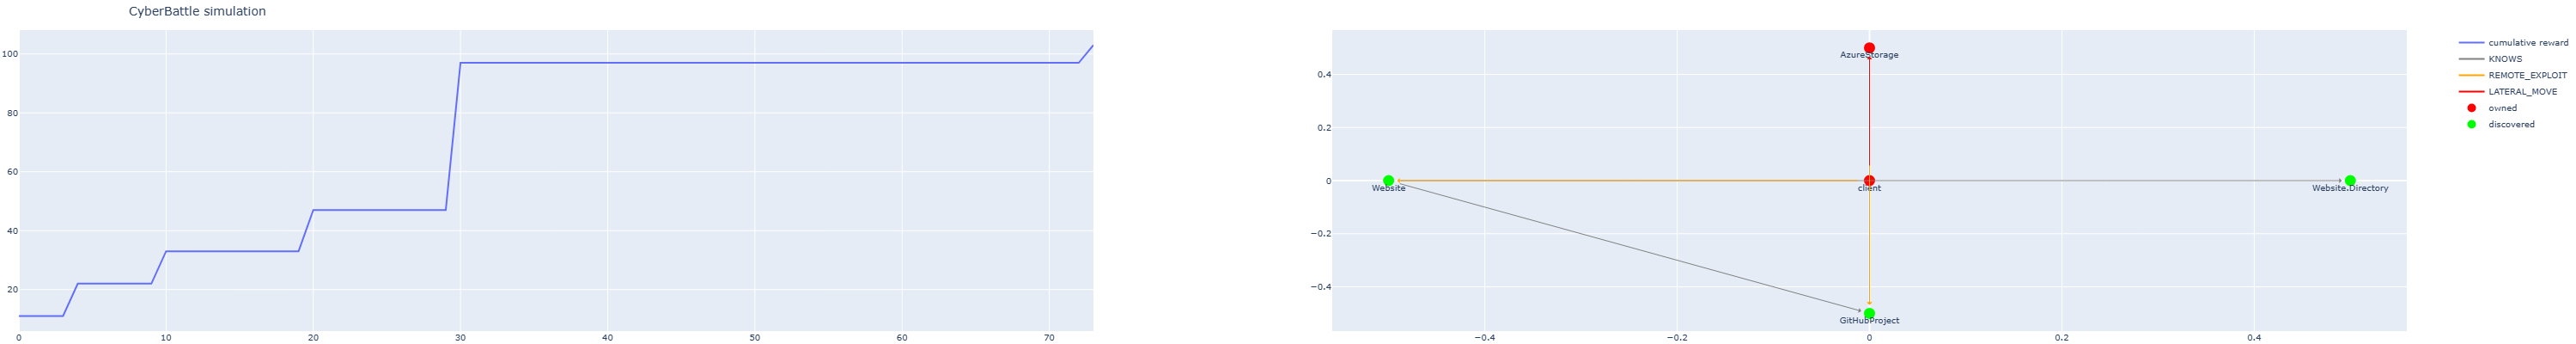

INFO: discovered node: GitHubProject
INFO: GOT REWARD: WEBSITE page content has a link to github -> Github project discovered!
INFO: Vulnerability 'ListAzureResources' not supported by node 'AzureStorage'
INFO: discovered node: Sharepoint
INFO: GOT REWARD: Navigating to parent URL revealed file `deprecation-checklist.txt` containinga URL to an external sharepoint website
####### rewarded action: {action}
total_reward=114.0 reward=11.0


status                    properties  \
id                                                            
client                  owned                            []   
AzureStorage            owned  [CTFFLAG:LeakedCustomerData]   
Website            discovered                           NaN   
GitHubProject      discovered                           NaN   
Website.Directory  discovered                           NaN   
Sharepoint         discovered                           NaN   

                         local_attacks  \
id                                       
client             [SearchEdgeHistory]   
AzureStorage                        []   
Website                           None   
GitHubProject                     None   
Website.Directory                 None   
Sharepoint                        None   

                                                      remote_attacks  
id                                                                    
client                                                            []  
AzureStorage                                [AccessDataWithSASToken]  
Website                            [ScanPageSource, ScanPageContent]  
GitHubProject                                   [CredScanGitHistory]  
Website.Directory  [NavigateWebDirectoryFurther, NavigateWebDirec...  
Sharepoint                           [ScanSharepointParentDirectory]

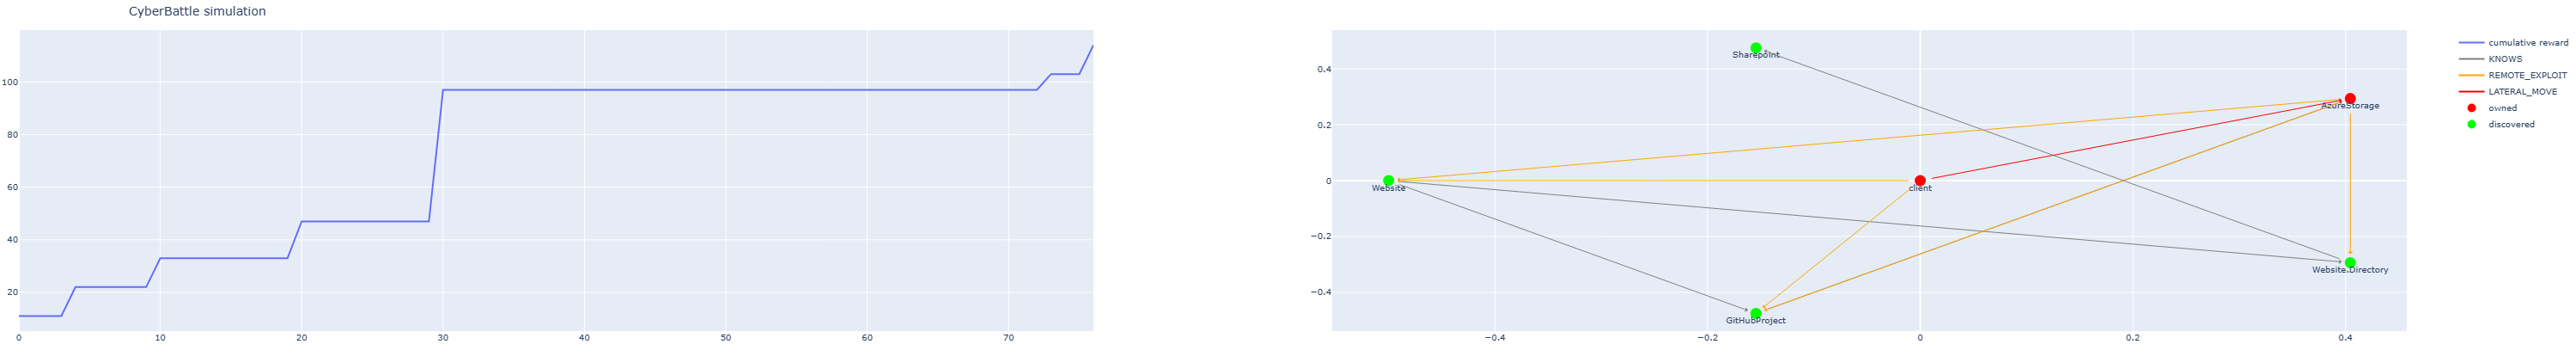

INFO: Vulnerability 'ScanSharepointParentDirectory' not supported by node 'AzureStorage'
INFO: GOT REWARD: Stole data using a publicly shared SAS token
INFO: Vulnerability 'ScanSharepointParentDirectory' not supported by node 'GitHubProject'
INFO: Vulnerability 'ListAzureResources' not supported by node 'GitHubProject'
INFO: target node 'AzureStorage' not listening on port 'SSH'
INFO: BLOCKED TRAFFIC: source node 'AzureStorage' is blocking outgoing traffic on port 'GIT'
INFO: discovered node: Website
INFO: GOT REWARD: Web browser history revealed website URL of interest
INFO: BLOCKED TRAFFIC: source node 'client' is blocking outgoing traffic on port 'PING'
INFO: BLOCKED TRAFFIC: source node 'AzureStorage' is blocking outgoing traffic on port 'PING'
INFO: discovered node: AzureStorage
INFO: discovered credential: CachedCredential(node='AzureStorage', port='HTTPS', credential='SASTOKEN1')
INFO: GOT REWARD: CredScan success: Some secure access token (SAS) was leaked in a reverted git comm

status                    properties  \
id                                                               
client                     owned                            []   
AzureStorage               owned  [CTFFLAG:LeakedCustomerData]   
Website               discovered                           NaN   
GitHubProject         discovered                           NaN   
Website.Directory     discovered                           NaN   
Sharepoint            discovered                           NaN   
AzureResourceManager  discovered                           NaN   

                            local_attacks  \
id                                          
client                [SearchEdgeHistory]   
AzureStorage                           []   
Website                              None   
GitHubProject                        None   
Website.Directory                    None   
Sharepoint                           None   
AzureResourceManager                 None   

                                                         remote_attacks  
id                                                                       
client                                                               []  
AzureStorage                                   [AccessDataWithSASToken]  
Website                               [ScanPageSource, ScanPageContent]  
GitHubProject                                      [CredScanGitHistory]  
Website.Directory     [NavigateWebDirectoryFurther, NavigateWebDirec...  
Sharepoint                              [ScanSharepointParentDirectory]  
AzureResourceManager                               [ListAzureResources]

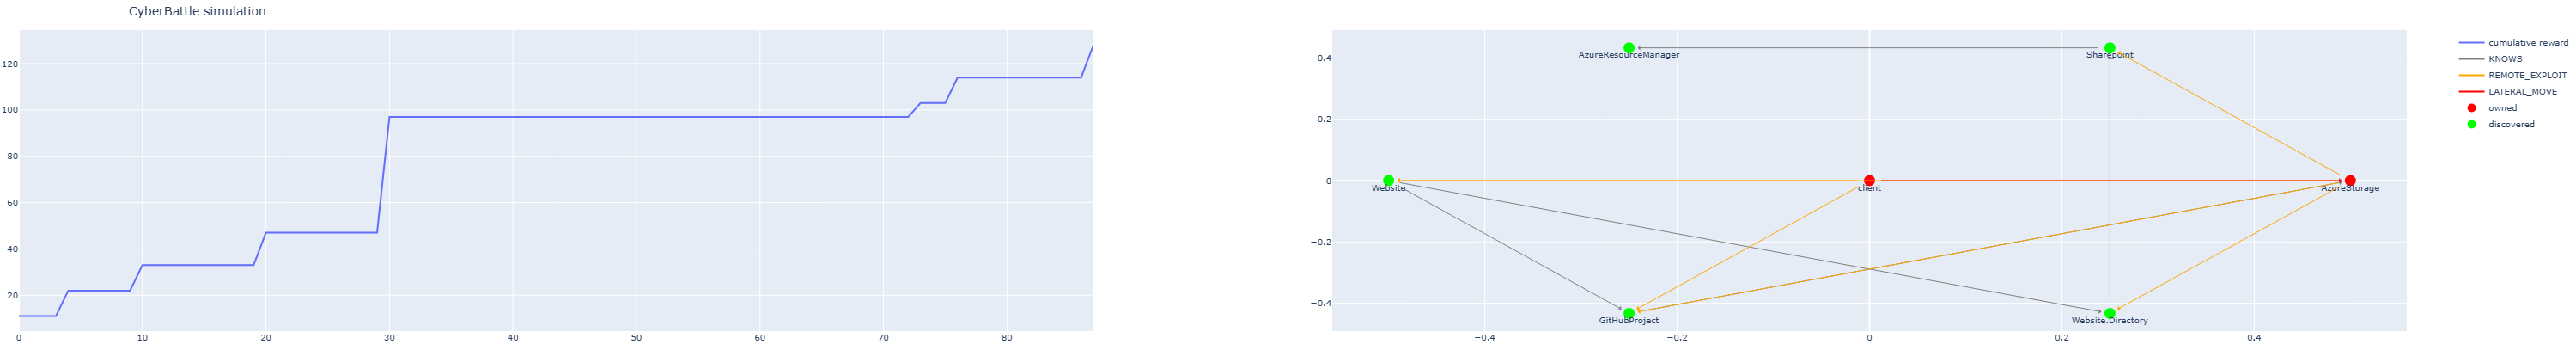

INFO: BLOCKED TRAFFIC: source node 'AzureStorage' is blocking outgoing traffic on port 'su'
INFO: Vulnerability 'ListAzureResources' not supported by node 'Sharepoint'
INFO: Vulnerability 'ScanSharepointParentDirectory' not supported by node 'client'
INFO: BLOCKED TRAFFIC: source node 'client' is blocking outgoing traffic on port 'PING'
INFO: BLOCKED TRAFFIC: source node 'client' is blocking outgoing traffic on port 'MySQL'
INFO: Vulnerability 'CredScanGitHistory' not supported by node 'client'
INFO: Vulnerability 'NavigateWebDirectory' not supported by node 'client'
INFO: Vulnerability 'CredScanGitHistory' not supported by node 'AzureStorage'
INFO: BLOCKED TRAFFIC: source node 'AzureStorage' is blocking outgoing traffic on port 'su'
INFO: BLOCKED TRAFFIC: source node 'AzureStorage' is blocking outgoing traffic on port 'su'
INFO: target node 'AzureResourceManager' not listening on port 'SSH'
INFO: BLOCKED TRAFFIC: source node 'client' is blocking outgoing traffic on port 'su'
INFO: inv

status                    properties  \
id                                                               
client                     owned                            []   
AzureStorage               owned  [CTFFLAG:LeakedCustomerData]   
Website               discovered                           NaN   
GitHubProject         discovered                           NaN   
Website.Directory     discovered                           NaN   
Sharepoint            discovered                           NaN   
AzureResourceManager  discovered                           NaN   

                            local_attacks  \
id                                          
client                [SearchEdgeHistory]   
AzureStorage                           []   
Website                              None   
GitHubProject                        None   
Website.Directory                    None   
Sharepoint                           None   
AzureResourceManager                 None   

                                                         remote_attacks  
id                                                                       
client                                                               []  
AzureStorage                                   [AccessDataWithSASToken]  
Website                               [ScanPageSource, ScanPageContent]  
GitHubProject                                      [CredScanGitHistory]  
Website.Directory     [NavigateWebDirectoryFurther, NavigateWebDirec...  
Sharepoint                              [ScanSharepointParentDirectory]  
AzureResourceManager                               [ListAzureResources]

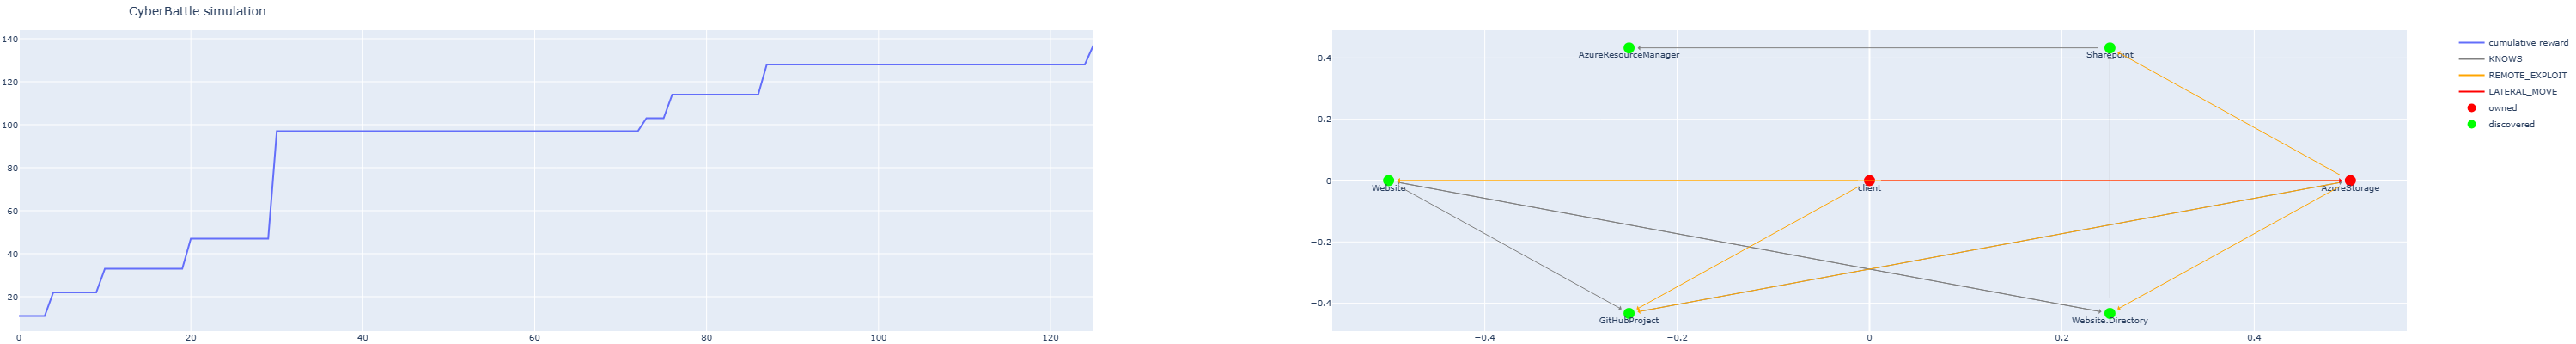

INFO: Vulnerability 'ScanSharepointParentDirectory' not supported by node 'GitHubProject'
INFO: BLOCKED TRAFFIC: source node 'client' is blocking outgoing traffic on port 'su'
INFO: BLOCKED TRAFFIC: source node 'AzureStorage' is blocking outgoing traffic on port 'PING'
INFO: BLOCKED TRAFFIC: source node 'AzureStorage' is blocking outgoing traffic on port 'GIT'
INFO: Vulnerability 'ListAzureResources' not supported by node 'Website'
INFO: BLOCKED TRAFFIC: source node 'AzureStorage' is blocking outgoing traffic on port 'PING'
INFO: Vulnerability 'ListAzureResources' not supported by node 'Website'
INFO: BLOCKED TRAFFIC: source node 'AzureStorage' is blocking outgoing traffic on port 'PING'
INFO: BLOCKED TRAFFIC: source node 'AzureStorage' is blocking outgoing traffic on port 'MySQL'
INFO: Vulnerability 'CredScanGitHistory' not supported by node 'Website'
INFO: discovered node: Website
INFO: discovered credential: CachedCredential(node='Website', port='MySQL', credential='ReusedMySqlCred-

status                     properties  \
id                                                                
client                     owned                             []   
Website                    owned  [MySql, Ubuntu, nginx/1.10.3]   
AzureStorage               owned   [CTFFLAG:LeakedCustomerData]   
GitHubProject         discovered                            NaN   
Website.Directory     discovered                            NaN   
Sharepoint            discovered                            NaN   
AzureResourceManager  discovered                            NaN   

                              local_attacks  \
id                                            
client                  [SearchEdgeHistory]   
Website               [CredScanBashHistory]   
AzureStorage                             []   
GitHubProject                          None   
Website.Directory                      None   
Sharepoint                             None   
AzureResourceManager                   None   

                                                         remote_attacks  
id                                                                       
client                                                               []  
Website                               [ScanPageSource, ScanPageContent]  
AzureStorage                                   [AccessDataWithSASToken]  
GitHubProject                                      [CredScanGitHistory]  
Website.Directory     [NavigateWebDirectoryFurther, NavigateWebDirec...  
Sharepoint                              [ScanSharepointParentDirectory]  
AzureResourceManager                               [ListAzureResources]

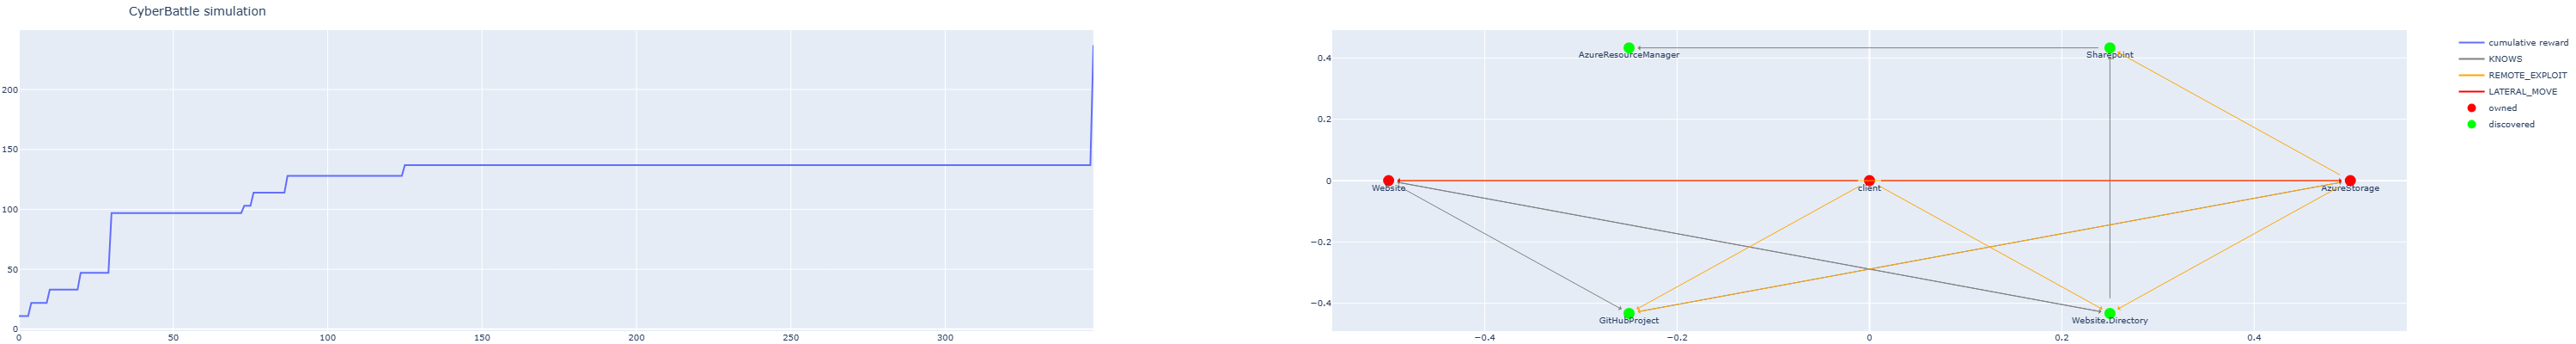

INFO: target node 'GitHubProject' not listening on port 'HTTPS'
INFO: target node 'GitHubProject' not listening on port 'HTTPS'
INFO: Vulnerability 'ScanPageSource' not supported by node 'AzureStorage'
INFO: Vulnerability 'NavigateWebDirectoryFurther' not supported by node 'AzureResourceManager'
INFO: BLOCKED TRAFFIC: source node 'client' is blocking outgoing traffic on port 'SSH-key'
INFO: BLOCKED TRAFFIC: target node 'Sharepoint' is blocking outgoing traffic on port 'su'
INFO: Vulnerability 'ScanPageContent' not supported by node 'Website.Directory'
INFO: BLOCKED TRAFFIC: source node 'AzureStorage' is blocking outgoing traffic on port 'su'
INFO: invalid credentials supplied
INFO: Vulnerability 'NavigateWebDirectory' not supported by node 'AzureStorage'
INFO: Vulnerability 'ListAzureResources' not supported by node 'client'
INFO: Vulnerability 'CredScanGitHistory' not supported by node 'Website'
INFO: discovered node: Website
INFO: GOT REWARD: Web browser history revealed website URL 

status                     properties  \
id                                                                
client                     owned                             []   
Website                    owned  [MySql, Ubuntu, nginx/1.10.3]   
AzureStorage               owned   [CTFFLAG:LeakedCustomerData]   
AzureResourceManager       owned  [CTFFLAG:LeakedCustomerData2]   
GitHubProject         discovered                            NaN   
Website.Directory     discovered                            NaN   
Sharepoint            discovered                            NaN   

                              local_attacks  \
id                                            
client                  [SearchEdgeHistory]   
Website               [CredScanBashHistory]   
AzureStorage                             []   
AzureResourceManager                     []   
GitHubProject                          None   
Website.Directory                      None   
Sharepoint                             None   

                                                         remote_attacks  
id                                                                       
client                                                               []  
Website                               [ScanPageSource, ScanPageContent]  
AzureStorage                                   [AccessDataWithSASToken]  
AzureResourceManager                               [ListAzureResources]  
GitHubProject                                      [CredScanGitHistory]  
Website.Directory     [NavigateWebDirectoryFurther, NavigateWebDirec...  
Sharepoint                              [ScanSharepointParentDirectory]

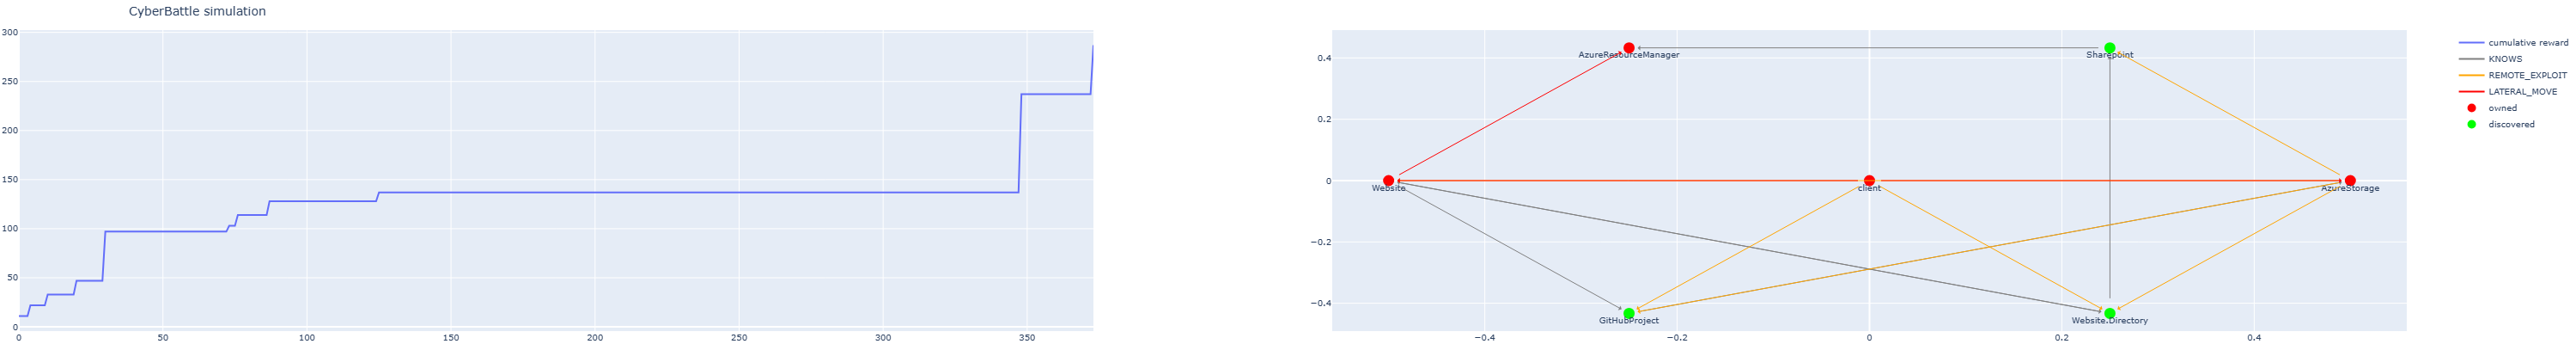

INFO: Vulnerability 'ListAzureResources' not supported by node 'Website'
INFO: discovered node: Website[user=monitor]
INFO: discovered credential: CachedCredential(node='Website[user=monitor]', port='SSH', credential='monitorBashCreds')
INFO: GOT REWARD: FLAG: SSH history revealed credentials for the monitoring user (monitor)
####### rewarded action: {action}
total_reward=301.0 reward=14.0


status                     properties  \
id                                                                 
client                      owned                             []   
Website                     owned  [MySql, Ubuntu, nginx/1.10.3]   
AzureStorage                owned   [CTFFLAG:LeakedCustomerData]   
AzureResourceManager        owned  [CTFFLAG:LeakedCustomerData2]   
GitHubProject          discovered                            NaN   
Website.Directory      discovered                            NaN   
Sharepoint             discovered                            NaN   
Website[user=monitor]  discovered                            NaN   

                               local_attacks  \
id                                             
client                   [SearchEdgeHistory]   
Website                [CredScanBashHistory]   
AzureStorage                              []   
AzureResourceManager                      []   
GitHubProject                           None   
Website.Directory                       None   
Sharepoint                              None   
Website[user=monitor]                   None   

                                                          remote_attacks  
id                                                                        
client                                                                []  
Website                                [ScanPageSource, ScanPageContent]  
AzureStorage                                    [AccessDataWithSASToken]  
AzureResourceManager                                [ListAzureResources]  
GitHubProject                                       [CredScanGitHistory]  
Website.Directory      [NavigateWebDirectoryFurther, NavigateWebDirec...  
Sharepoint                               [ScanSharepointParentDirectory]  
Website[user=monitor]                                                 []

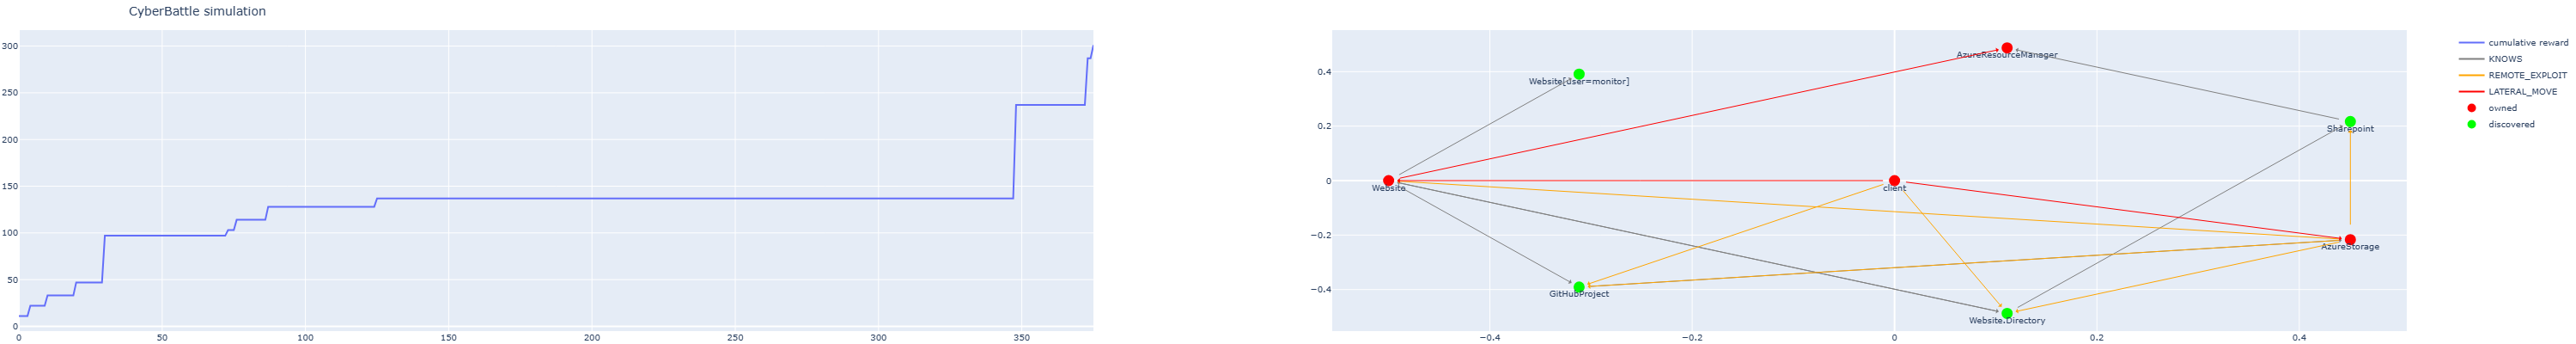

INFO: BLOCKED TRAFFIC: source node 'client' is blocking outgoing traffic on port 'PING'
INFO: BLOCKED TRAFFIC: source node 'AzureStorage' is blocking outgoing traffic on port 'MySQL'
INFO: Vulnerability 'ScanPageContent' not supported by node 'Sharepoint'
INFO: Vulnerability 'NavigateWebDirectoryFurther' not supported by node 'GitHubProject'
INFO: invalid credentials supplied
INFO: BLOCKED TRAFFIC: source node 'AzureStorage' is blocking outgoing traffic on port 'GIT'
INFO: discovered node: Sharepoint
INFO: GOT REWARD: Navigating to parent URL revealed file `deprecation-checklist.txt` containinga URL to an external sharepoint website
INFO: target node 'AzureResourceManager' not listening on port 'SSH'
INFO: BLOCKED TRAFFIC: source node 'client' is blocking outgoing traffic on port 'MySQL'
INFO: BLOCKED TRAFFIC: source node 'AzureStorage' is blocking outgoing traffic on port 'PING'
INFO: discovered node: AzureResourceManager
INFO: discovered credential: CachedCredential(node='AzureResour

status                     properties  \
id                                                                 
client                      owned                             []   
Website                     owned  [MySql, Ubuntu, nginx/1.10.3]   
AzureStorage                owned   [CTFFLAG:LeakedCustomerData]   
AzureResourceManager        owned  [CTFFLAG:LeakedCustomerData2]   
GitHubProject          discovered                            NaN   
Website.Directory      discovered                            NaN   
Sharepoint             discovered                            NaN   
Website[user=monitor]  discovered                            NaN   
AzureVM                discovered                            NaN   

                               local_attacks  \
id                                             
client                   [SearchEdgeHistory]   
Website                [CredScanBashHistory]   
AzureStorage                              []   
AzureResourceManager                      []   
GitHubProject                           None   
Website.Directory                       None   
Sharepoint                              None   
Website[user=monitor]                   None   
AzureVM                                 None   

                                                          remote_attacks  
id                                                                        
client                                                                []  
Website                                [ScanPageSource, ScanPageContent]  
AzureStorage                                    [AccessDataWithSASToken]  
AzureResourceManager                                [ListAzureResources]  
GitHubProject                                       [CredScanGitHistory]  
Website.Directory      [NavigateWebDirectoryFurther, NavigateWebDirec...  
Sharepoint                               [ScanSharepointParentDirectory]  
Website[user=monitor]                                                 []  
AzureVM                                                               []

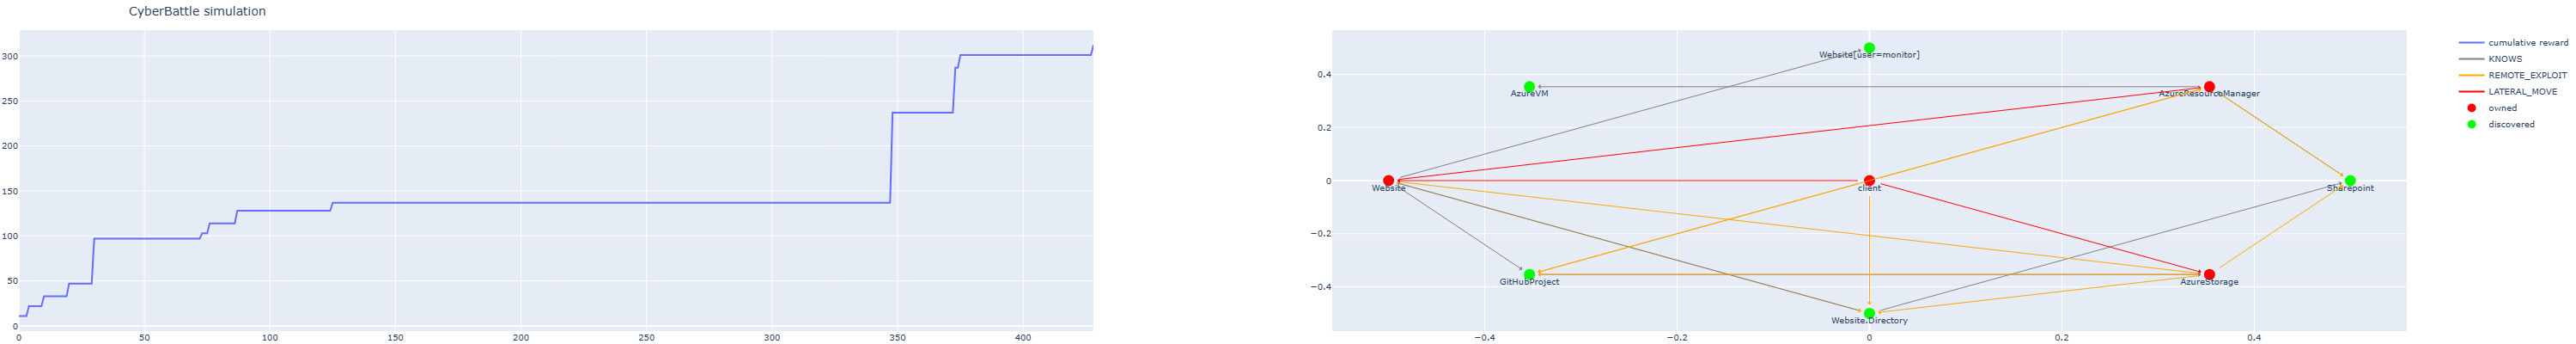

INFO: discovered node: Website
INFO: discovered credential: CachedCredential(node='Website', port='MySQL', credential='ReusedMySqlCred-web')
INFO: GOT REWARD: Discover browseable web directory: Navigating to parent URL revealed file `readme.txt`with secret data (aflag); and `getting-started.txt` with MYSQL credentials
INFO: BLOCKED TRAFFIC: source node 'AzureResourceManager' is blocking outgoing traffic on port 'GIT'
INFO: Vulnerability 'CredScanGitHistory' not supported by node 'Website'
INFO: Vulnerability 'CredScanGitHistory' not supported by node 'AzureStorage'
INFO: Vulnerability 'AccessDataWithSASToken' not supported by node 'client'
INFO: Vulnerability 'ScanSharepointParentDirectory' not supported by node 'AzureResourceManager'
INFO: BLOCKED TRAFFIC: target node 'AzureVM' is blocking outgoing traffic on port 'HTTPS'
INFO: Vulnerability 'AccessDataWithSASToken' not supported by node 'Sharepoint'
INFO: discovered node: Website.Directory
INFO: GOT REWARD: Viewing the web page sourc

status                     properties  \
id                                                                 
client                      owned                             []   
Website                     owned  [MySql, Ubuntu, nginx/1.10.3]   
AzureStorage                owned   [CTFFLAG:LeakedCustomerData]   
AzureResourceManager        owned  [CTFFLAG:LeakedCustomerData2]   
Website[user=monitor]       owned  [MySql, Ubuntu, nginx/1.10.3]   
GitHubProject          discovered                            NaN   
Website.Directory      discovered                            NaN   
Sharepoint             discovered                            NaN   
AzureVM                discovered                            NaN   

                                  local_attacks  \
id                                                
client                      [SearchEdgeHistory]   
Website                   [CredScanBashHistory]   
AzureStorage                                 []   
AzureResourceManager                         []   
Website[user=monitor]  [CredScan-HomeDirectory]   
GitHubProject                              None   
Website.Directory                          None   
Sharepoint                                 None   
AzureVM                                    None   

                                                          remote_attacks  
id                                                                        
client                                                                []  
Website                                [ScanPageSource, ScanPageContent]  
AzureStorage                                    [AccessDataWithSASToken]  
AzureResourceManager                                [ListAzureResources]  
Website[user=monitor]                                                 []  
GitHubProject                                       [CredScanGitHistory]  
Website.Directory      [NavigateWebDirectoryFurther, NavigateWebDirec...  
Sharepoint                               [ScanSharepointParentDirectory]  
AzureVM                                                               []

INFO: discovered node: AzureResourceManager[user=monitor]
INFO: discovered credential: CachedCredential(node='AzureResourceManager[user=monitor]', port='HTTPS', credential='azuread_user_credentials')
INFO: GOT REWARD: SSH: cat ~/azurecreds.txt (running as monitor) revealed Azure user credential!
####### rewarded action: {action}
total_reward=426.0 reward=14.0


status                     properties  \
id                                                                              
client                                   owned                             []   
Website                                  owned  [MySql, Ubuntu, nginx/1.10.3]   
AzureStorage                             owned   [CTFFLAG:LeakedCustomerData]   
AzureResourceManager                     owned  [CTFFLAG:LeakedCustomerData2]   
Website[user=monitor]                    owned  [MySql, Ubuntu, nginx/1.10.3]   
GitHubProject                       discovered                            NaN   
Website.Directory                   discovered                            NaN   
Sharepoint                          discovered                            NaN   
AzureVM                             discovered                            NaN   
AzureResourceManager[user=monitor]  discovered                            NaN   

                                               local_attacks  \
id                                                             
client                                   [SearchEdgeHistory]   
Website                                [CredScanBashHistory]   
AzureStorage                                              []   
AzureResourceManager                                      []   
Website[user=monitor]               [CredScan-HomeDirectory]   
GitHubProject                                           None   
Website.Directory                                       None   
Sharepoint                                              None   
AzureVM                                                 None   
AzureResourceManager[user=monitor]                      None   

                                                                       remote_attacks  
id                                                                                     
client                                                                             []  
Website                                             [ScanPageSource, ScanPageContent]  
AzureStorage                                                 [AccessDataWithSASToken]  
AzureResourceManager                                             [ListAzureResources]  
Website[user=monitor]                                                              []  
GitHubProject                                                    [CredScanGitHistory]  
Website.Directory                   [NavigateWebDirectoryFurther, NavigateWebDirec...  
Sharepoint                                            [ScanSharepointParentDirectory]  
AzureVM                                                                            []  
AzureResourceManager[user=monitor]                                                 []

INFO: target node 'Website.Directory' not listening on port 'SSH'
INFO: BLOCKED TRAFFIC: target node 'AzureVM' is blocking outgoing traffic on port 'HTTPS'
INFO: Vulnerability 'NavigateWebDirectoryFurther' not supported by node 'GitHubProject'
INFO: Vulnerability 'CredScanGitHistory' not supported by node 'Website'
INFO: Vulnerability 'NavigateWebDirectoryFurther' not supported by node 'Website[user=monitor]'
INFO: Vulnerability 'ScanPageContent' not supported by node 'Website.Directory'
INFO: BLOCKED TRAFFIC: source node 'client' is blocking outgoing traffic on port 'su'
INFO: target node 'client' not listening on port 'SSH'
INFO: BLOCKED TRAFFIC: source node 'client' is blocking outgoing traffic on port 'PING'
INFO: invalid credentials supplied
INFO: target node 'AzureResourceManager' not listening on port 'SSH'
INFO: Vulnerability 'AccessDataWithSASToken' not supported by node 'Website[user=monitor]'
INFO: target node 'client' not listening on port 'HTTPS'
INFO: Vulnerability 'ScanP

status                     properties  \
id                                                                              
client                                   owned                             []   
Website                                  owned  [MySql, Ubuntu, nginx/1.10.3]   
AzureStorage                             owned   [CTFFLAG:LeakedCustomerData]   
AzureResourceManager                     owned  [CTFFLAG:LeakedCustomerData2]   
Website[user=monitor]                    owned  [MySql, Ubuntu, nginx/1.10.3]   
AzureResourceManager[user=monitor]       owned                             []   
GitHubProject                       discovered                            NaN   
Website.Directory                   discovered                            NaN   
Sharepoint                          discovered                            NaN   
AzureVM                             discovered                            NaN   

                                               local_attacks  \
id                                                             
client                                   [SearchEdgeHistory]   
Website                                [CredScanBashHistory]   
AzureStorage                                              []   
AzureResourceManager                                      []   
Website[user=monitor]               [CredScan-HomeDirectory]   
AzureResourceManager[user=monitor]                        []   
GitHubProject                                           None   
Website.Directory                                       None   
Sharepoint                                              None   
AzureVM                                                 None   

                                                                       remote_attacks  
id                                                                                     
client                                                                             []  
Website                                             [ScanPageSource, ScanPageContent]  
AzureStorage                                                 [AccessDataWithSASToken]  
AzureResourceManager                                             [ListAzureResources]  
Website[user=monitor]                                                              []  
AzureResourceManager[user=monitor]                                                 []  
GitHubProject                                                    [CredScanGitHistory]  
Website.Directory                   [NavigateWebDirectoryFurther, NavigateWebDirec...  
Sharepoint                                            [ScanSharepointParentDirectory]  
AzureVM                                                                            []

INFO: BLOCKED TRAFFIC: source node 'AzureResourceManager[user=monitor]' is blocking outgoing traffic on port 'MySQL'
INFO: Vulnerability 'ScanPageSource' not supported by node 'Website.Directory'
INFO: BLOCKED TRAFFIC: source node 'AzureStorage' is blocking outgoing traffic on port 'MySQL'
INFO: Vulnerability 'ListAzureResources' not supported by node 'Website.Directory'
INFO: BLOCKED TRAFFIC: source node 'AzureStorage' is blocking outgoing traffic on port 'GIT'
INFO: Vulnerability 'ScanPageContent' not supported by node 'client'
INFO: BLOCKED TRAFFIC: source node 'client' is blocking outgoing traffic on port 'MySQL'
INFO: invalid credentials supplied
INFO: Vulnerability 'ScanPageContent' not supported by node 'Website.Directory'
INFO: target node 'Website.Directory' not listening on port 'SSH'
INFO: BLOCKED TRAFFIC: target node 'Sharepoint' is blocking outgoing traffic on port 'su'
INFO: Vulnerability 'ScanPageContent' not supported by node 'AzureResourceManager'
INFO: BLOCKED TRAFFIC

status                     properties  \
id                                                                              
client                                   owned                             []   
Website                                  owned  [MySql, Ubuntu, nginx/1.10.3]   
AzureStorage                             owned   [CTFFLAG:LeakedCustomerData]   
AzureResourceManager                     owned  [CTFFLAG:LeakedCustomerData2]   
Website[user=monitor]                    owned  [MySql, Ubuntu, nginx/1.10.3]   
AzureResourceManager[user=monitor]       owned                             []   
GitHubProject                       discovered                            NaN   
Website.Directory                   discovered                            NaN   
Sharepoint                          discovered                            NaN   
AzureVM                             discovered                            NaN   

                                               local_attacks  \
id                                                             
client                                   [SearchEdgeHistory]   
Website                                [CredScanBashHistory]   
AzureStorage                                              []   
AzureResourceManager                                      []   
Website[user=monitor]               [CredScan-HomeDirectory]   
AzureResourceManager[user=monitor]                        []   
GitHubProject                                           None   
Website.Directory                                       None   
Sharepoint                                              None   
AzureVM                                                 None   

                                                                       remote_attacks  
id                                                                                     
client                                                                             []  
Website                                             [ScanPageSource, ScanPageContent]  
AzureStorage                                                 [AccessDataWithSASToken]  
AzureResourceManager                                             [ListAzureResources]  
Website[user=monitor]                                                              []  
AzureResourceManager[user=monitor]                                                 []  
GitHubProject                                                    [CredScanGitHistory]  
Website.Directory                   [NavigateWebDirectoryFurther, NavigateWebDirec...  
Sharepoint                                            [ScanSharepointParentDirectory]  
AzureVM                                                                            []

simulation ended


In [6]:
for i_episode in range(1):
    observation = gym_env.reset()

    total_reward = 0

    for t in range(5600):
        action = gym_env.sample_valid_action()

        observation, reward, done, info = gym_env.step(action)
        
        total_reward += reward
        
        if reward>0:
            print('####### rewarded action: {action}')
            print(f'total_reward={total_reward} reward={reward}')
            gym_env.render()
    
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break

    gym_env.render()

gym_env.close()
print("simulation ended")

### End of simulation